In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import sklearn.metrics as metrics

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_dataset = "fraudTrain.csv"
train_dataset = pd.read_csv(train_dataset)

In [5]:
train_dataset.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [6]:
train_dataset.tail(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296665,1296665,2020-06-21 12:08:42,213193596103206,fraud_Gulgowski LLC,home,72.17,James,Hunt,M,7369 Gabriel Tunnel,...,45.7549,-84.4470,95,Electrical engineer,1994-02-09,108c103b26f686c24c021aaf4210977e,1371816522,44.938461,-83.996234,0
1296666,1296666,2020-06-21 12:09:22,4587657402165341815,"fraud_Hyatt, Russel and Gleichner",health_fitness,7.30,Amber,Lewis,F,6296 John Keys Suite 858,...,41.0646,-87.5917,2135,"Psychotherapist, child",2004-05-08,37a18c6fb0c5c722b6339ffedc82f55a,1371816562,40.556811,-88.092339,0
1296667,1296667,2020-06-21 12:10:56,4822367783500458,"fraud_Hahn, Douglas and Schowalter",travel,19.71,Christopher,Farrell,M,97070 Anderson Land,...,28.0758,-81.5929,33804,Exercise physiologist,1991-01-01,34e72e0a659a6c8f4a20ee65594f3a7d,1371816656,27.465871,-81.511804,0
1296668,1296668,2020-06-21 12:11:23,213141712584544,"fraud_Metz, Russel and Metz",kids_pets,100.85,Margaret,Curtis,F,742 Oneill Shore,...,32.1530,-90.1217,19685,Fine artist,1984-12-24,0d86d8c17638d7eff77db9c6a878b477,1371816683,31.377697,-90.528450,0
1296669,1296669,2020-06-21 12:11:36,4400011257587661852,fraud_Stiedemann Inc,misc_pos,37.38,Marissa,Powell,F,474 Allen Haven,...,41.4972,-98.7858,509,"Nurse, children's",1980-09-15,9a7ea2625cf8303efe34e3c09546868f,1371816696,41.728638,-99.039660,0
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [7]:
test_dataset = "fraudTest.csv"
test_dataset = pd.read_csv(test_dataset)

In [8]:
test_dataset.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


In [9]:
test_dataset.tail(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555709,555709,2020-12-31 23:57:18,30344654314976,"fraud_Larkin, Stracke and Greenfelder",entertainment,46.71,Christine,Johnson,F,8011 Chapman Tunnel Apt. 568,...,39.8127,-120.6405,1725,Chartered legal executive (England and Wales),1967-05-27,a7105564935ea3977dc61ff9ced3bf5e,1388534238,38.963543,-120.457121,0
555710,555710,2020-12-31 23:57:50,3524574586339330,"fraud_Heathcote, Yost and Kertzmann",shopping_net,29.56,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,9fc9f6f9be3182d519a61a119cf97199,1388534270,27.593881,-80.855092,0
555711,555711,2020-12-31 23:57:56,341546199006537,fraud_Schmidt-Larkin,home,12.68,Mark,Brown,M,8580 Moore Cove,...,64.7556,-165.6723,145,"Administrator, education",1939-11-09,a8310343c189e4a5b6316050d2d6b014,1388534276,65.623593,-165.186033,0
555712,555712,2020-12-31 23:58:04,501802953619,"fraud_Pouros, Walker and Spencer",kids_pets,13.02,Robert,Flores,M,3277 Fields Meadows Apt. 790,...,41.5403,-122.9366,308,Call centre manager,1958-09-20,bd7071fd5c9510a5594ee196368ac80e,1388534284,41.973127,-123.553032,0
555713,555713,2020-12-31 23:58:34,3523843138706408,"fraud_Prosacco, Kreiger and Kovacek",home,17.00,Grace,Williams,F,28812 Charles Mill Apt. 628,...,32.6176,-86.9475,1412,Drilling engineer,1970-11-20,6d04313bfe4b661b8ca2b6a499a320fe,1388534314,32.164145,-87.539669,0
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [10]:
train_dataset.shape

(1296675, 23)

In [11]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [12]:
train_dataset.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [13]:
train_dataset.corr()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,0.000386,-0.000251,0.000709,0.000602,-0.000676,-0.001678,0.998971,0.000541,-0.000671,-0.004767
cc_num,0.000386,1.000000,0.001769,0.041459,-0.059271,-0.048278,-0.008991,0.000354,-0.058942,-0.048252,-0.000981
amt,-0.000251,0.001769,1.000000,0.001843,-0.001926,-0.000187,0.005818,-0.000293,-0.001873,-0.000151,0.219404
zip,0.000709,0.041459,0.001843,1.000000,-0.114290,-0.909732,0.078467,0.000670,-0.113561,-0.908924,-0.002162
lat,0.000602,-0.059271,-0.001926,-0.114290,1.000000,-0.015533,-0.155730,0.000632,0.993592,-0.015509,0.001894
long,-0.000676,-0.048278,-0.000187,-0.909732,-0.015533,1.000000,-0.052715,-0.000642,-0.015452,0.999120,0.001721
city_pop,-0.001678,-0.008991,0.005818,0.078467,-0.155730,-0.052715,1.000000,-0.001714,-0.154781,-0.052687,0.002136
unix_time,0.998971,0.000354,-0.000293,0.000670,0.000632,-0.000642,-0.001714,1.000000,0.000561,-0.000635,-0.005078
merch_lat,0.000541,-0.058942,-0.001873,-0.113561,0.993592,-0.015452,-0.154781,0.000561,1.000000,-0.015431,0.001741
merch_long,-0.000671,-0.048252,-0.000151,-0.908924,-0.015509,0.999120,-0.052687,-0.000635,-0.015431,1.000000,0.001721


In [14]:
(train_dataset=='?').sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [15]:
train_dataset.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [16]:
train_dataset=train_dataset.dropna()

In [17]:
test_dataset.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [18]:
(test_dataset=='?').sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [19]:
test_dataset.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

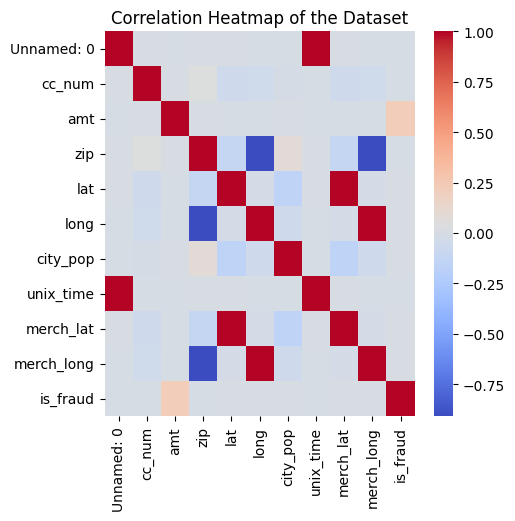

In [20]:
plt.figure(figsize=(5,5))
heatmap = sns.heatmap(train_dataset.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of the Dataset")
plt.show()

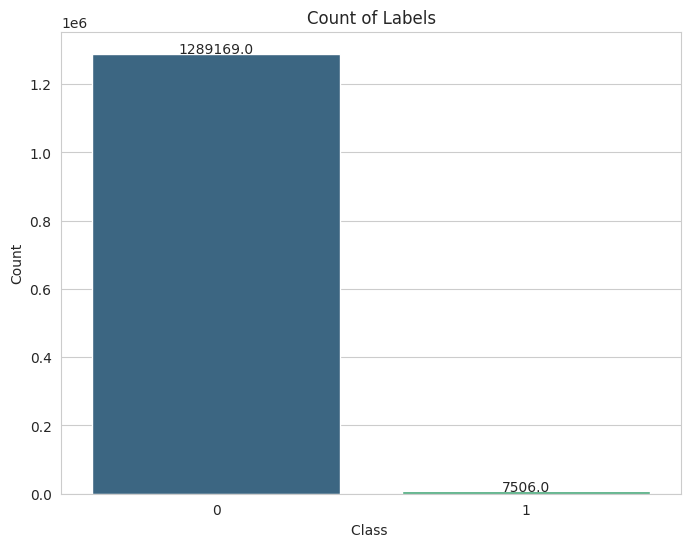

In [21]:
# Create a bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Use sns.countplot to create the bar chart and capture the 'ax' object
ax = sns.countplot(x='is_fraud', data=train_dataset, palette='viridis')

# Annotate the count values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Customize the plot (optional)
plt.xlabel('Class ')
plt.ylabel('Count')
plt.title('Count of Labels')

# Show the plot
plt.show()

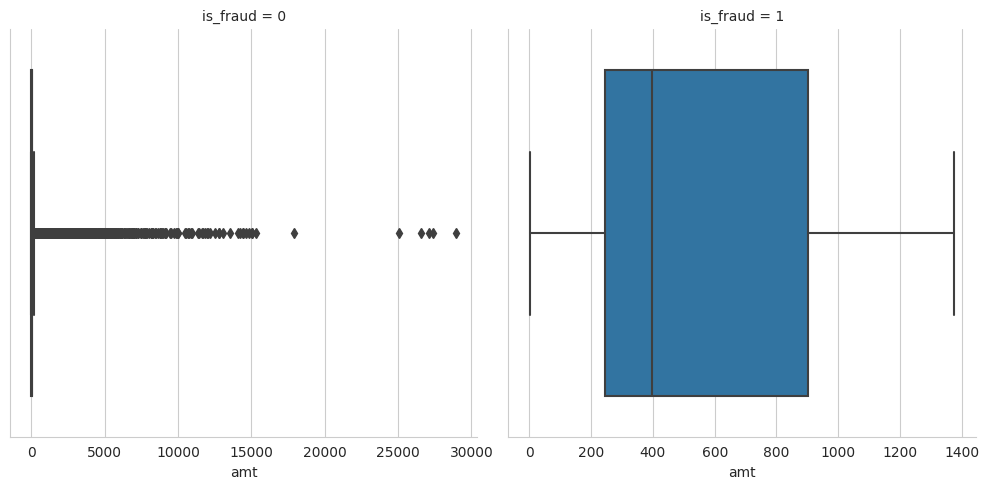

In [22]:
sns.catplot(data=train_dataset, x='amt', col='is_fraud', kind='box', sharex=False)

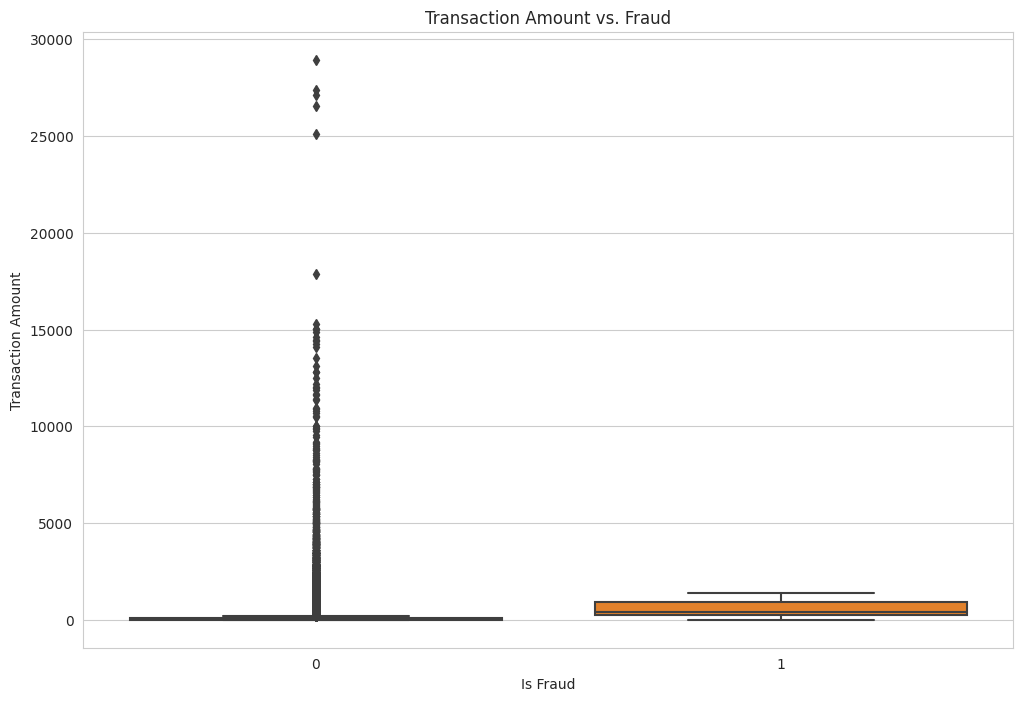

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='is_fraud', y='amt', data=train_dataset)
plt.title('Transaction Amount vs. Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()

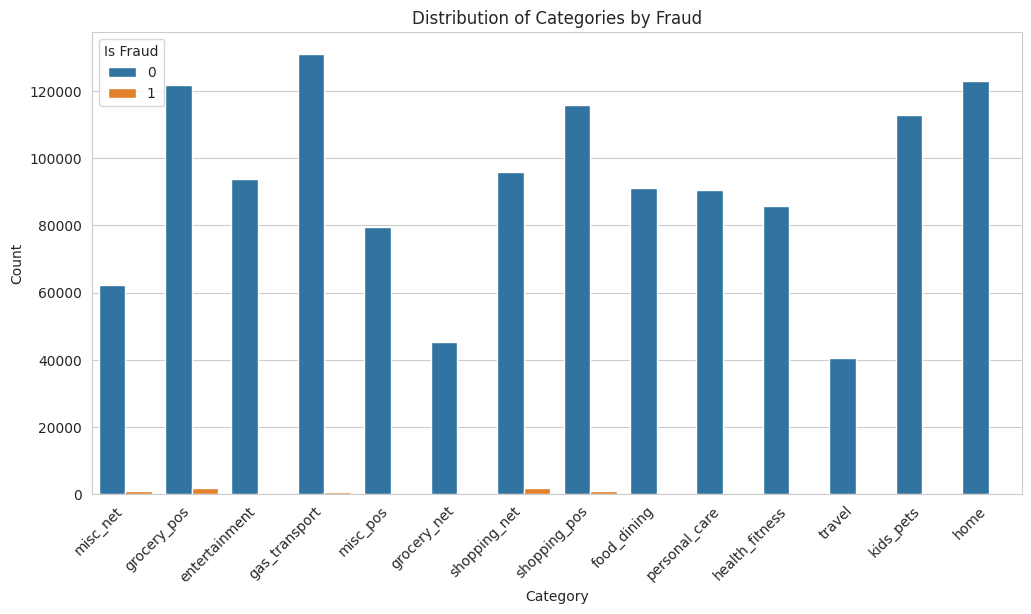

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=train_dataset)
plt.title('Distribution of Categories by Fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud')
plt.show()

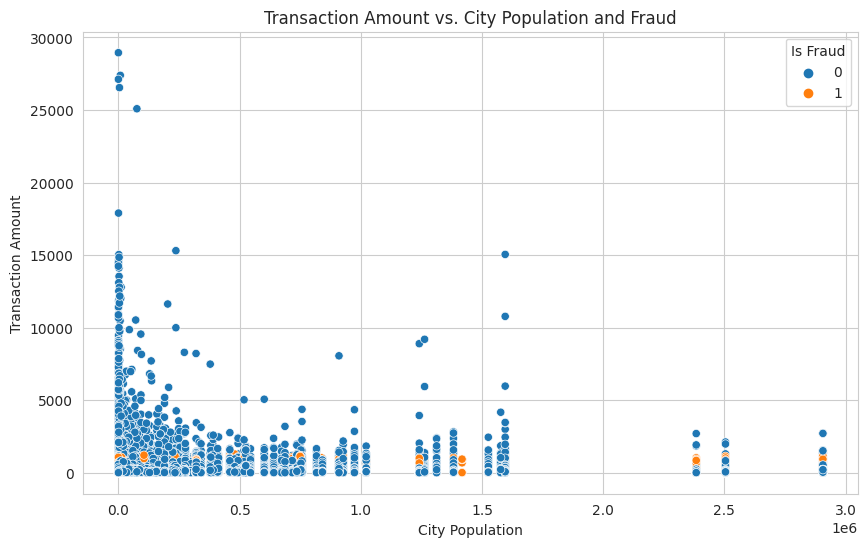

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='city_pop', y='amt', hue='is_fraud', data=train_dataset)
plt.title('Transaction Amount vs. City Population and Fraud')
plt.xlabel('City Population')
plt.ylabel('Transaction Amount')
plt.legend(title='Is Fraud')
plt.show()

<Figure size 1000x600 with 0 Axes>

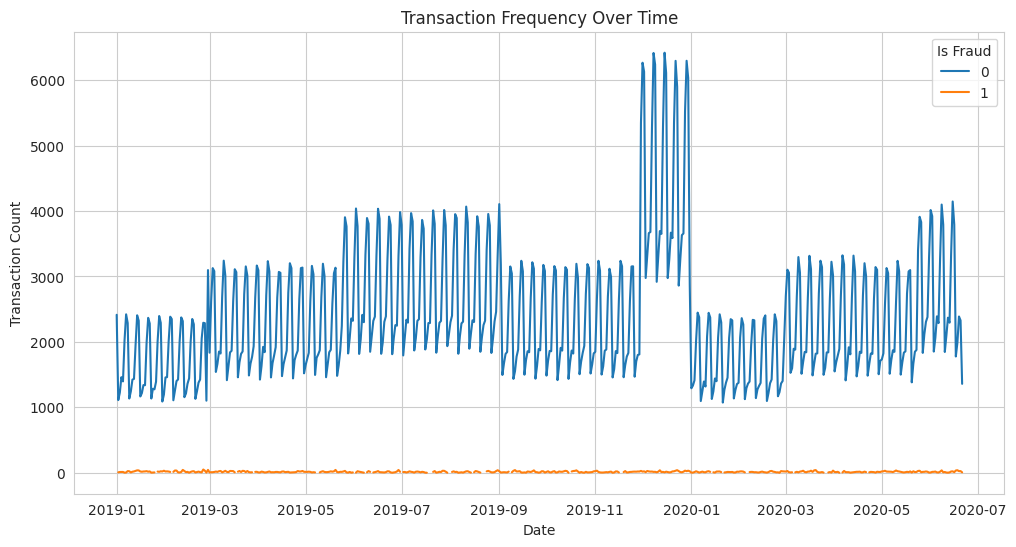

In [26]:
plt.figure(figsize=(10, 6))
train_dataset['trans_date_trans_time'] = pd.to_datetime(train_dataset['trans_date_trans_time'])
train_dataset['trans_date'] = train_dataset['trans_date_trans_time'].dt.date
transaction_counts = train_dataset.groupby(['trans_date', 'is_fraud']).size().unstack()
transaction_counts.plot(kind='line', figsize=(12, 6))
plt.title('Transaction Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud')
plt.show()

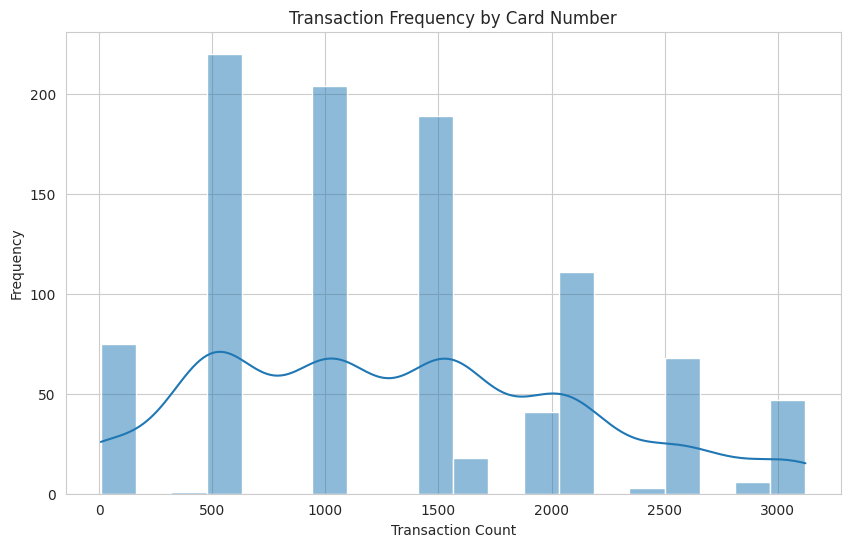

In [27]:
card_transaction_counts = train_dataset['cc_num'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(card_transaction_counts, bins=20, kde=True)
plt.title('Transaction Frequency by Card Number')
plt.xlabel('Transaction Count')
plt.ylabel('Frequency')
plt.show()

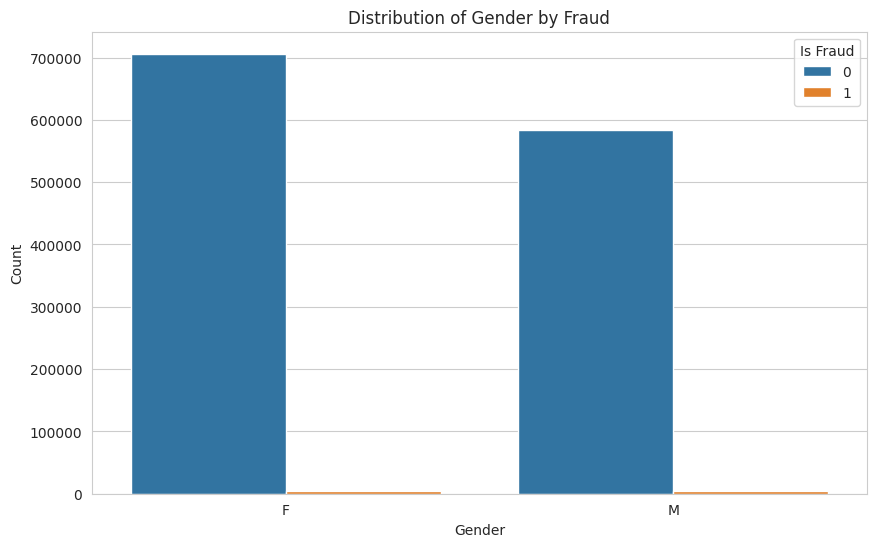

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='is_fraud', data=train_dataset)
plt.title('Distribution of Gender by Fraud')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

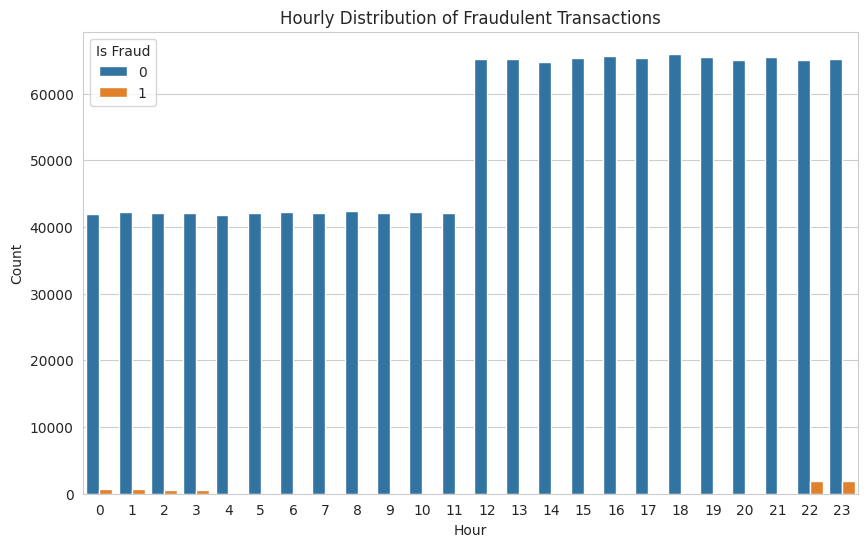

In [29]:
train_dataset['trans_hour'] = pd.to_datetime(train_dataset['trans_date_trans_time']).dt.hour
train_dataset['trans_day'] = pd.to_datetime(train_dataset['trans_date_trans_time']).dt.dayofweek

# Plot hourly distribution of fraud
plt.figure(figsize=(10, 6))
sns.countplot(x='trans_hour', hue='is_fraud', data=train_dataset)
plt.title('Hourly Distribution of Fraudulent Transactions')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

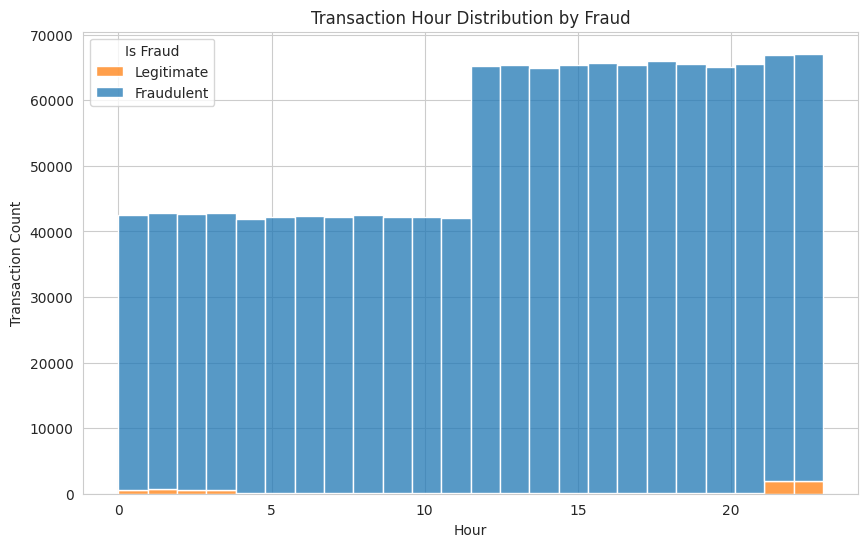

In [30]:
train_dataset['trans_hour'] = pd.to_datetime(train_dataset['trans_date_trans_time']).dt.hour
plt.figure(figsize=(10, 6))
sns.histplot(data=train_dataset, x='trans_hour', hue='is_fraud', multiple='stack', bins=24)
plt.title('Transaction Hour Distribution by Fraud')
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud', labels=['Legitimate', 'Fraudulent'])  # Specify legend labels
plt.show()

In [31]:
def data_pre(X):
    # Irrelevant columns
    del_col=['merchant','first','last','street','zip','unix_time','Unnamed: 0','trans_num','cc_num']
    X.drop(columns=del_col,inplace=True)

    # Data Conversion
    X['trans_date_trans_time']=pd.to_datetime(X['trans_date_trans_time'])
    X['trans_date']=X['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
    X['trans_date']=pd.to_datetime(X['trans_date'])
    X['dob']=pd.to_datetime(X['dob'])

    #Calculate Age of each transaction
    X["age"] = (X["trans_date"] - X["dob"]).dt.days //365
    X['trans_month']=X['trans_date'].dt.month
    X['trans_year']=X['trans_date'].dt.year

    # The gender column is transformed to binary values
    X['gender']=X['gender'].apply(lambda x : 1 if x=='M' else 0)
    X['gender']=X['gender'].astype(int)

    # Distance Calculated
    X['lat_dis']=abs(X['lat']-X['merch_lat'])
    X['long_dis']=abs(X['long']-X['merch_long'])

    X=pd.get_dummies(X,columns=['category'])
    X=X.drop(columns=['city','trans_date_trans_time','state','job','merch_lat','merch_long','lat','long','dob','trans_date','trans_hour','trans_day'])
    return X


In [32]:
test_dataset['trans_hour'] = pd.to_datetime(test_dataset['trans_date_trans_time']).dt.hour
test_dataset['trans_day'] = pd.to_datetime(test_dataset['trans_date_trans_time']).dt.dayofweek

In [33]:
train_dataset_preprocessed=data_pre(train_dataset.copy())
train_dataset_preprocessed.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,lat_dis,long_dis,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,0,30,1,2019,0.067507,0.870215,0,...,0,0,0,0,1,0,0,0,0,0
1,107.23,0,149,0,40,1,2019,0.271247,0.024038,0,...,1,0,0,0,0,0,0,0,0,0
2,220.11,1,4154,0,56,1,2019,0.969904,0.107519,1,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939,0,52,1,2019,0.803731,0.447271,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99,0,32,1,2019,0.254299,0.830441,0,...,0,0,0,0,0,1,0,0,0,0


In [34]:
test_dataset_preprocessed=data_pre(test_dataset.copy())
test_dataset_preprocessed.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,lat_dis,long_dis,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497,0,52,6,2020,0.020491,0.265214,0,...,0,0,0,0,0,0,1,0,0,0
1,29.84,0,302,0,30,6,2020,0.870202,0.475569,0,...,0,0,0,0,0,0,1,0,0,0
2,41.28,0,34496,0,49,6,2020,0.177090,0.659611,0,...,0,1,0,0,0,0,0,0,0,0
3,60.05,1,54767,0,32,6,2020,0.242698,0.063961,0,...,0,0,0,0,0,1,0,0,0,0
4,3.19,1,1126,0,65,6,2020,0.706248,0.867734,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
X_train=train_dataset_preprocessed.drop('is_fraud',axis=1)
y_train=train_dataset_preprocessed['is_fraud']

In [36]:
X_test=test_dataset_preprocessed.drop('is_fraud',axis=1)
y_test=test_dataset_preprocessed['is_fraud']

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# 1.) RANDOM FOREST CLASSIFIER

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_pred_rf = rf_model.predict(X_test)

In [41]:
print('The accuracy of Random Forest Classifier is: ' + str(accuracy_score(y_test, y_pred_rf)))

The accuracy of Random Forest Classifier is: 0.9979899913445465


<Axes: >

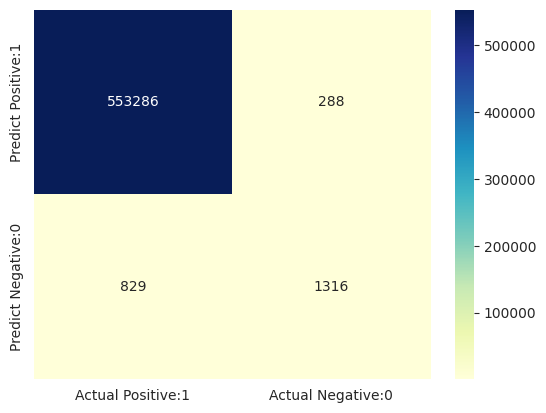

In [42]:
cm = confusion_matrix(y_test, y_pred_rf)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [43]:
report = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.82      0.61      0.70      2145

    accuracy                           1.00    555719
   macro avg       0.91      0.81      0.85    555719
weighted avg       1.00      1.00      1.00    555719



In [44]:
# calculate the FPR and TPR for all thresholds of the classification
probs = rf_model.predict_proba(X_test)
probs = probs[:, 1]
rf_fpr, rf_tpr, thresholds = metrics.roc_curve(y_test, probs)
rf_auc = metrics.roc_auc_score(y_test, probs)

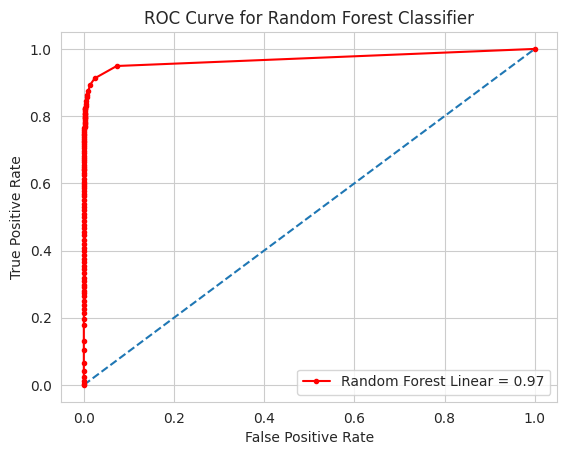

In [45]:
plt.title('ROC Curve for Random Forest Classifier')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rf_fpr, rf_tpr, 'r', marker='.', label = 'Random Forest Linear = %0.2f' % rf_auc )
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 2.) GRADIENT BOOST CLASSIFIER

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier()

In [48]:
y_pred_gb = gradient_boosting.predict(X_test)

In [49]:
print('The accuracy of Gradient Boosting Classifier is: ' + str(accuracy_score(y_test, y_pred_gb)))

The accuracy of Gradient Boosting Classifier is: 0.9975329258132257


<Axes: >

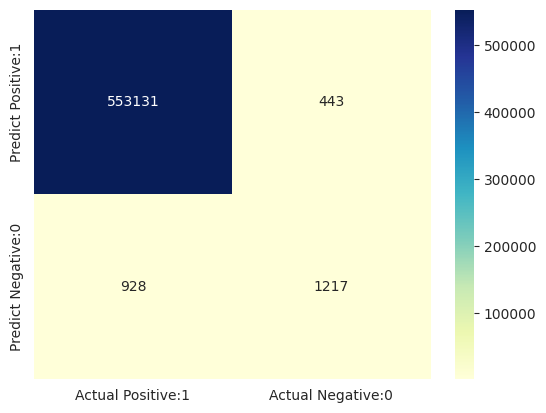

In [50]:
cm = confusion_matrix(y_test, y_pred_gb)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [51]:
report = classification_report(y_test, y_pred_gb)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.73      0.57      0.64      2145

    accuracy                           1.00    555719
   macro avg       0.87      0.78      0.82    555719
weighted avg       1.00      1.00      1.00    555719



In [52]:
# calculate the FPR and TPR for all thresholds of the classification
probs = gradient_boosting.predict_proba(X_test)
probs = probs[:, 1]
gb_fpr, gb_tpr, thresholds = metrics.roc_curve(y_test, probs)
gb_auc = metrics.roc_auc_score(y_test, probs)

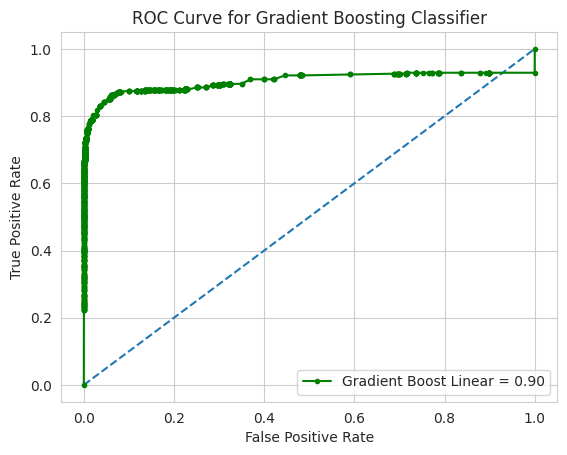

In [53]:
plt.title('ROC Curve for Gradient Boosting Classifier')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(gb_fpr, gb_tpr, 'g', marker='.', label = 'Gradient Boost Linear = %0.2f' % gb_auc )
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 3.) MULTI-LAYER PERCEPTRON CLASSIFIER

In [54]:
from sklearn.neural_network import MLPClassifier

In [55]:
mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train, y_train)

MLPClassifier()

In [56]:
y_pred_mlp = mlp_classifier.predict(X_test)

In [57]:
print('The accuracy of Multi Layer Perceptron Classifier is: ' + str(accuracy_score(y_test, y_pred_mlp)))

The accuracy of Multi Layer Perceptron Classifier is: 0.9977776538142479


<Axes: >

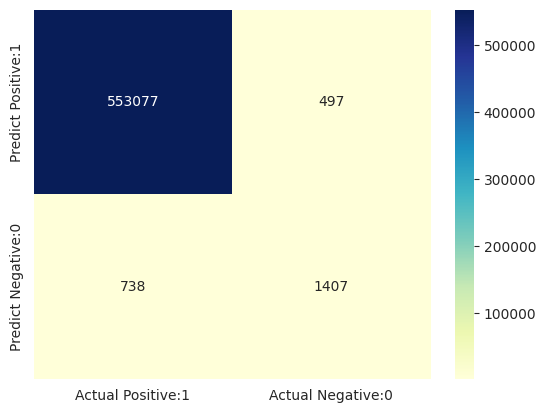

In [58]:
cm = confusion_matrix(y_test, y_pred_mlp)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [59]:
report = classification_report(y_test, y_pred_mlp)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.74      0.66      0.69      2145

    accuracy                           1.00    555719
   macro avg       0.87      0.83      0.85    555719
weighted avg       1.00      1.00      1.00    555719



In [60]:
# calculate the FPR and TPR for all thresholds of the classification
probs = mlp_classifier.predict_proba(X_test)
probs = probs[:, 1]
mlp_fpr, mlp_tpr, thresholds = metrics.roc_curve(y_test, probs)
mlp_auc = metrics.roc_auc_score(y_test, probs)

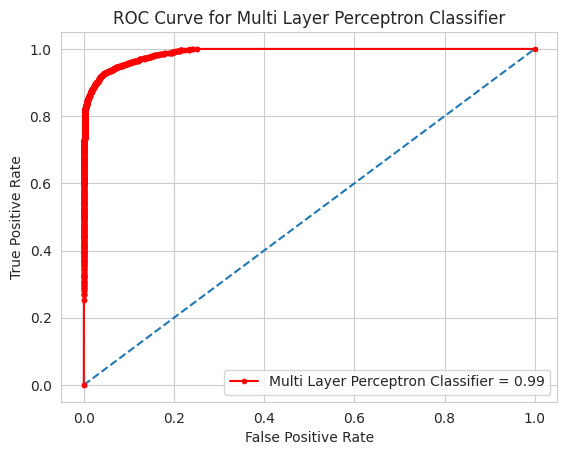

In [61]:
plt.title('ROC Curve for Multi Layer Perceptron Classifier')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(mlp_fpr, mlp_tpr, 'r', marker='.', label = 'Multi Layer Perceptron Classifier = %0.2f' % mlp_auc )
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 4.) GAUSSIAN NAIVE-BAYES

In [62]:
from sklearn.naive_bayes import GaussianNB

In [63]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [64]:
y_pred_nb = naive_bayes.predict(X_test)

In [65]:
print('The accuracy of Gaussian Naive-Bayes is: ' + str(accuracy_score(y_test, y_pred_nb)))

The accuracy of Gaussian Naive-Bayes is: 0.8665224690895938


<Axes: >

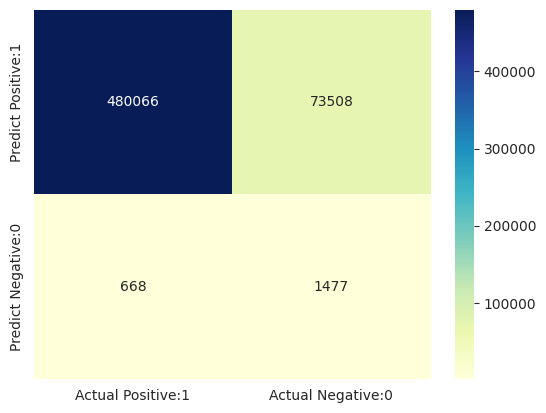

In [66]:
cm = confusion_matrix(y_test, y_pred_nb)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [67]:
report = classification_report(y_test, y_pred_nb)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93    553574
           1       0.02      0.69      0.04      2145

    accuracy                           0.87    555719
   macro avg       0.51      0.78      0.48    555719
weighted avg       0.99      0.87      0.92    555719



In [68]:
# calculate the FPR and TPR for all thresholds of the classification
probs = naive_bayes.predict_proba(X_test)
probs = probs[:, 1]
nb_fpr, nb_tpr, thresholds = metrics.roc_curve(y_test, probs)
nb_auc = metrics.roc_auc_score(y_test, probs)

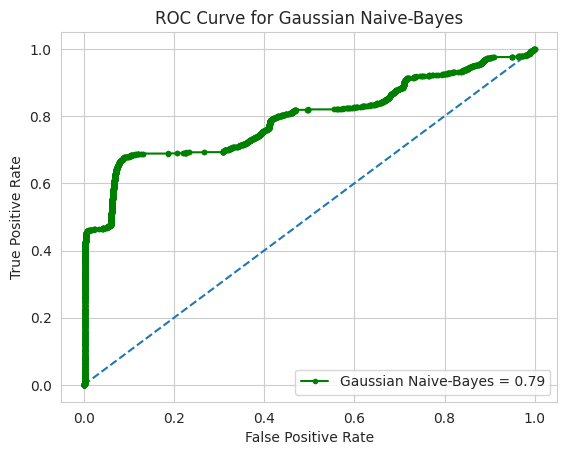

In [69]:
plt.title('ROC Curve for Gaussian Naive-Bayes')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(nb_fpr, nb_tpr, 'g', marker='.', label = 'Gaussian Naive-Bayes = %0.2f' % nb_auc )
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 5.) LOGISTIC REGRESSION

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [72]:
y_pred_lr = logistic_regression.predict(X_test)

In [73]:
print('The accuracy of Logistic Regression is: ' + str(accuracy_score(y_test, y_pred_lr)))

The accuracy of Logistic Regression is: 0.9956164896287513


<Axes: >

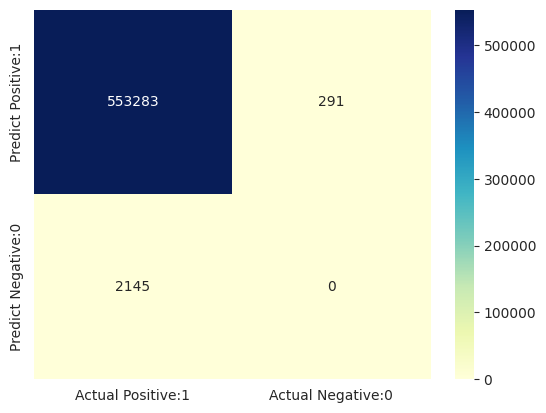

In [74]:
cm = confusion_matrix(y_test, y_pred_lr)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [75]:
report = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [76]:
# calculate the FPR and TPR for all thresholds of the classification
probs = logistic_regression.predict_proba(X_test)
probs = probs[:, 1]
lr_fpr, lr_tpr, thresholds = metrics.roc_curve(y_test, probs)
lr_auc = metrics.roc_auc_score(y_test, probs)

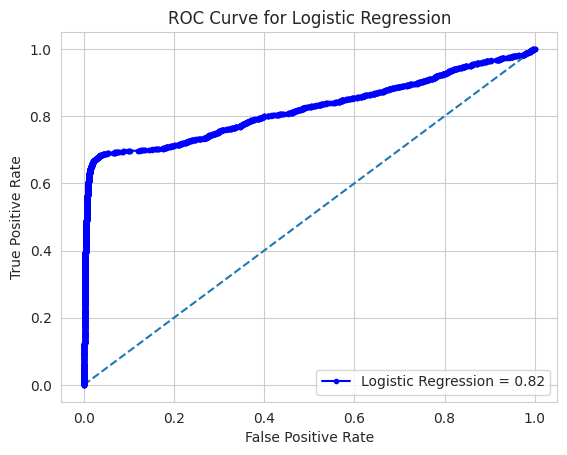

In [77]:
plt.title('ROC Curve for Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_fpr, lr_tpr, 'b', marker='.', label = 'Logistic Regression = %0.2f' % lr_auc )
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 6.) DECISION TREE CLASSSIFIER

In [78]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [79]:
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [80]:
y_pred_dt = decision_tree.predict(X_test)

In [81]:
print('The accuracy of Decision Tree Classifier is: ' + str(accuracy_score(y_test, y_pred_dt)))

The accuracy of Decision Tree Classifier is: 0.9974411528128425


<Axes: >

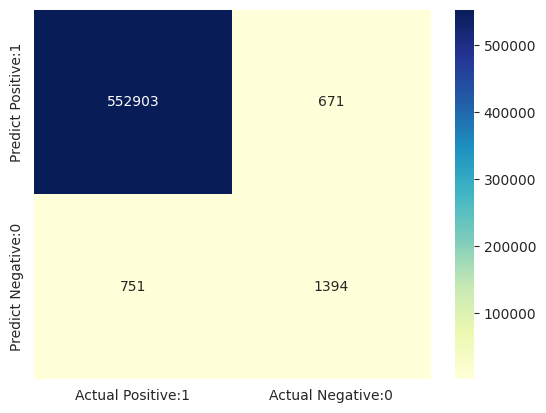

In [82]:
cm = confusion_matrix(y_test, y_pred_dt)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [83]:
report = classification_report(y_test, y_pred_dt)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.68      0.65      0.66      2145

    accuracy                           1.00    555719
   macro avg       0.84      0.82      0.83    555719
weighted avg       1.00      1.00      1.00    555719



In [84]:
# calculate the FPR and TPR for all thresholds of the classification
probs = decision_tree.predict_proba(X_test)
probs = probs[:, 1]
dt_fpr, dt_tpr, thresholds = metrics.roc_curve(y_test, probs)
dt_auc = metrics.roc_auc_score(y_test, probs)

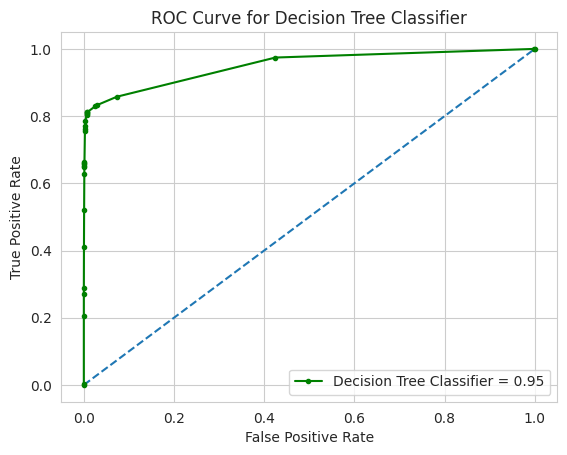

In [85]:
plt.title('ROC Curve for Decision Tree Classifier')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dt_fpr, dt_tpr, 'g', marker='.', label = 'Decision Tree Classifier = %0.2f' % dt_auc )
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

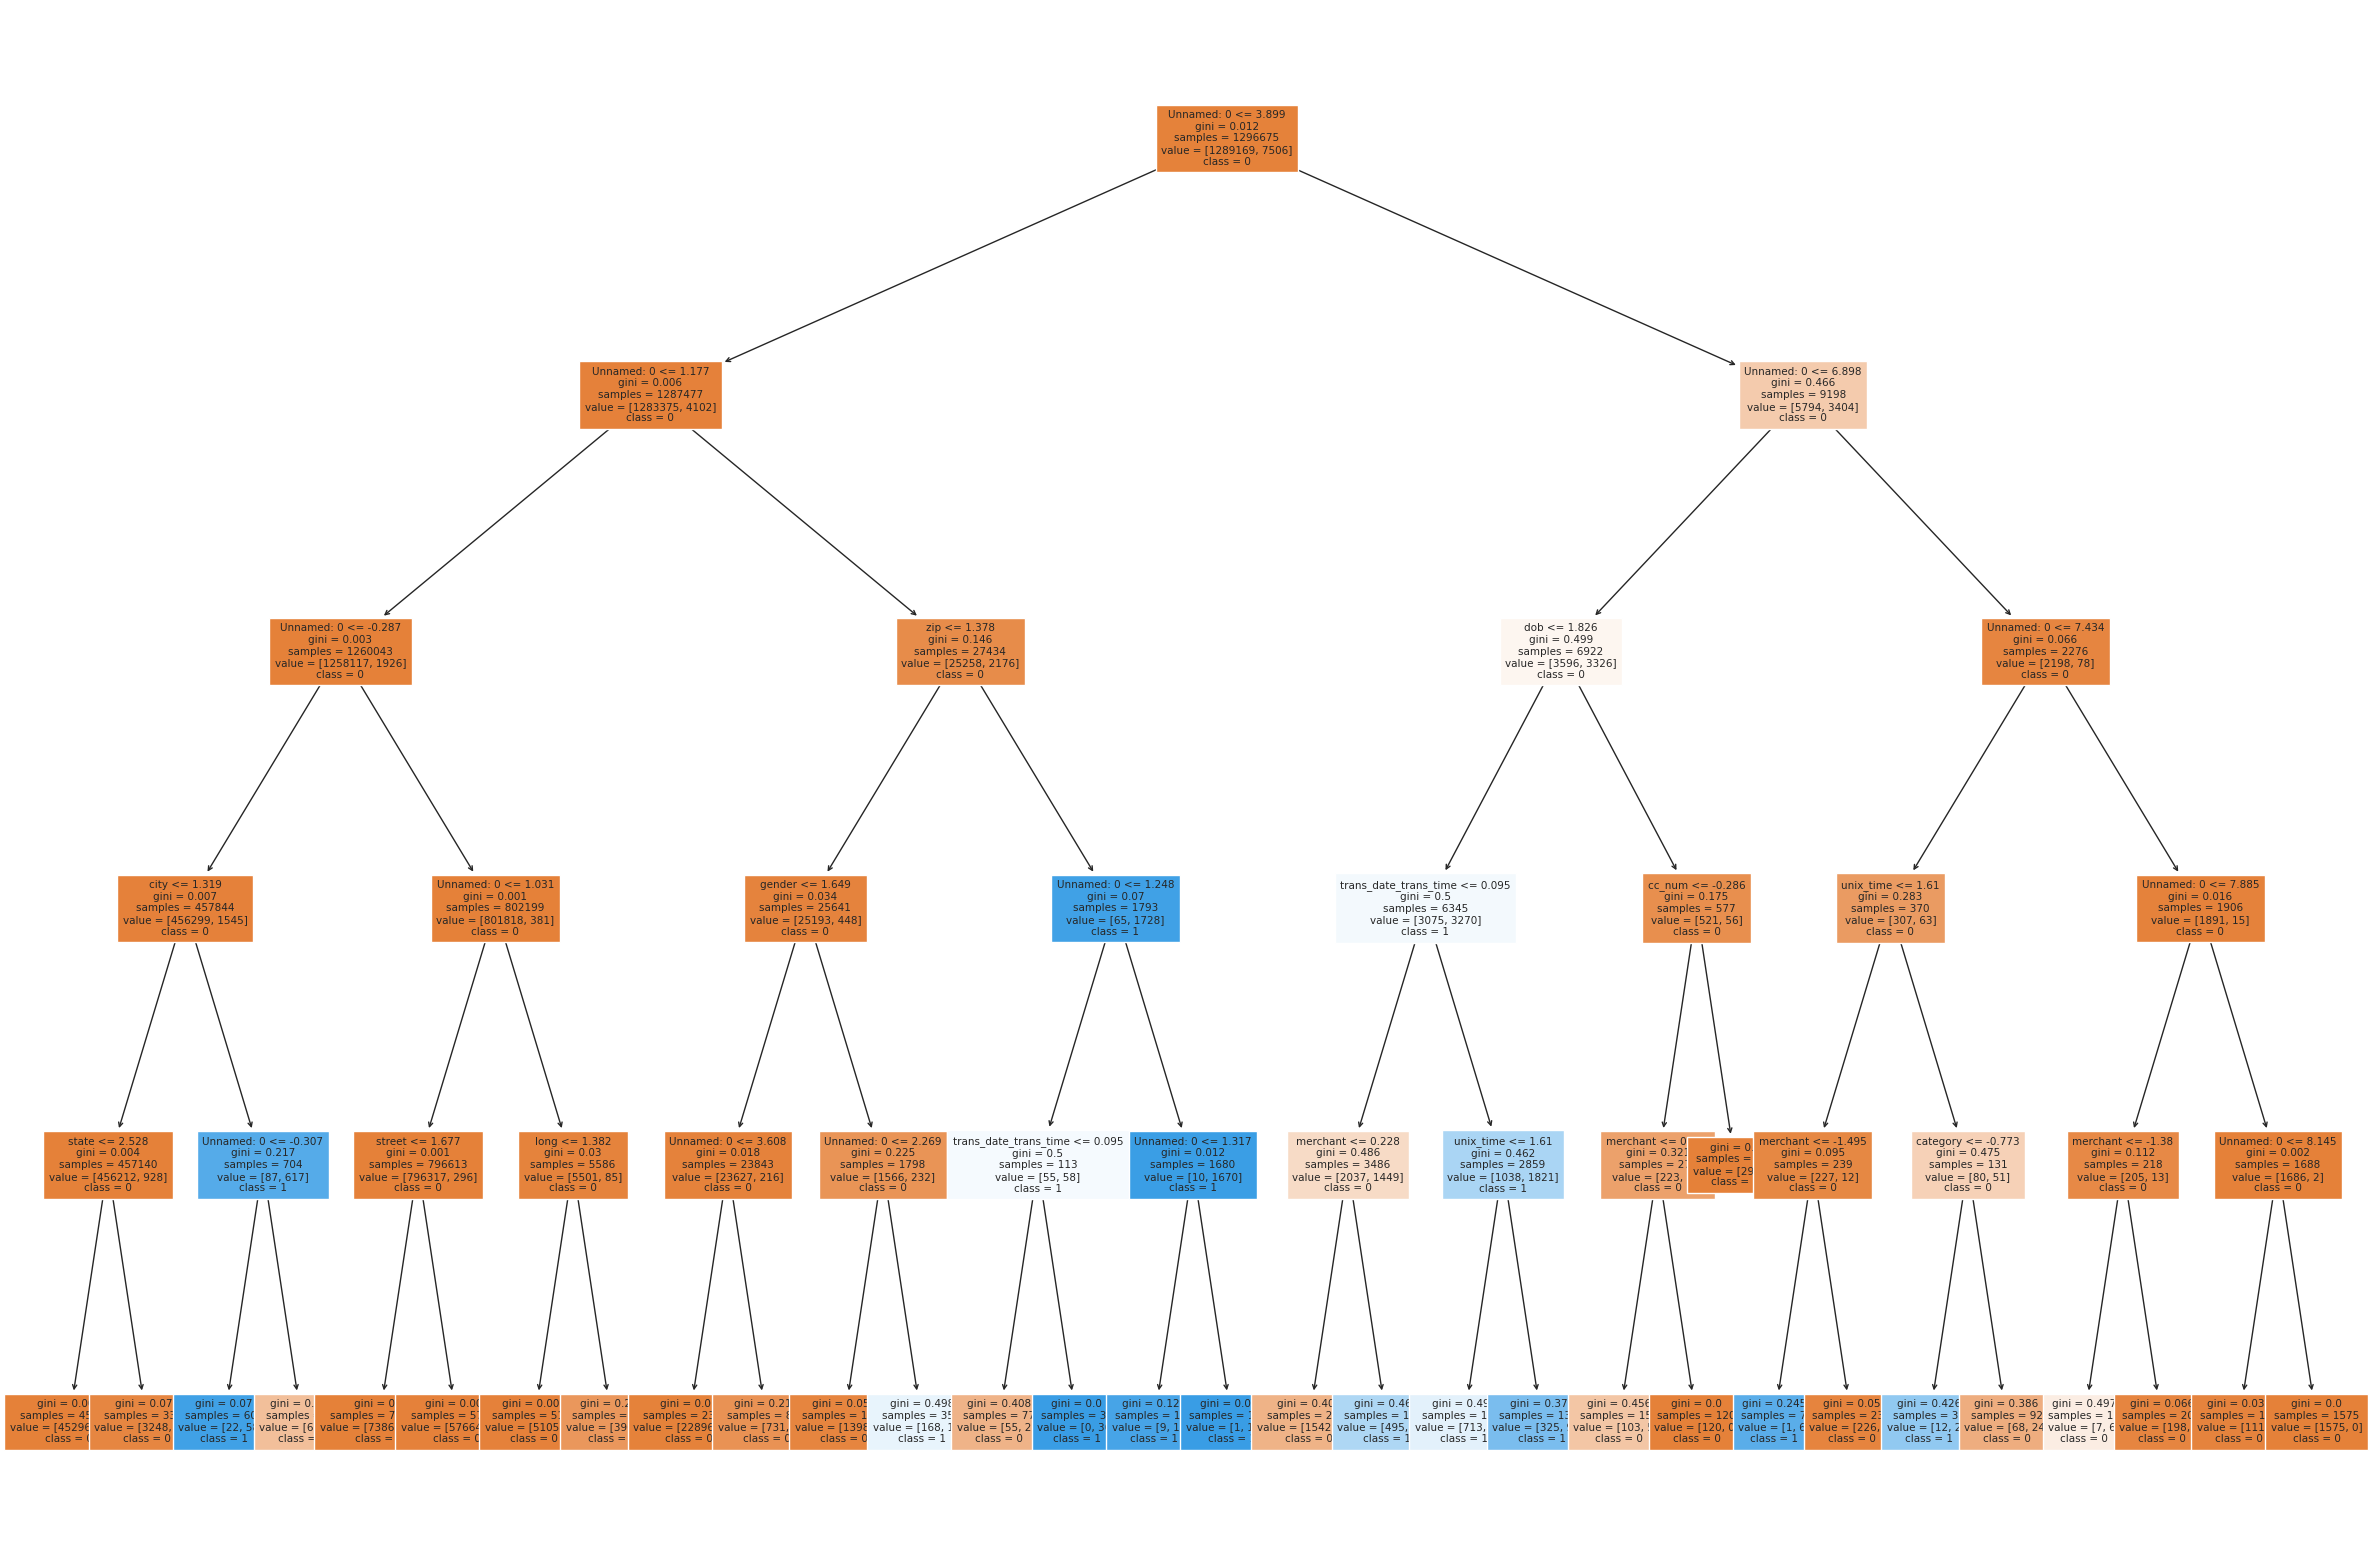

In [86]:
tree = plt.figure(figsize=(30,20))
decision_tree = plot_tree(decision_tree, filled=True, feature_names=test_dataset.columns, class_names=["0", "1"], fontsize=7.5)

# 7.) ADAPTIVE BOOSTING CLASSIFIER

In [87]:
from sklearn.ensemble import AdaBoostClassifier

In [88]:
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, learning_rate=1.0, random_state=42)
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [89]:
y_pred_adaboost = adaboost_classifier.predict(X_test)

In [90]:
print('The accuracy of Adaptive Boosting Classifier is: ' + str(accuracy_score(y_test, y_pred_adaboost)))

The accuracy of Adaptive Boosting Classifier is: 0.9959907795126673


<Axes: >

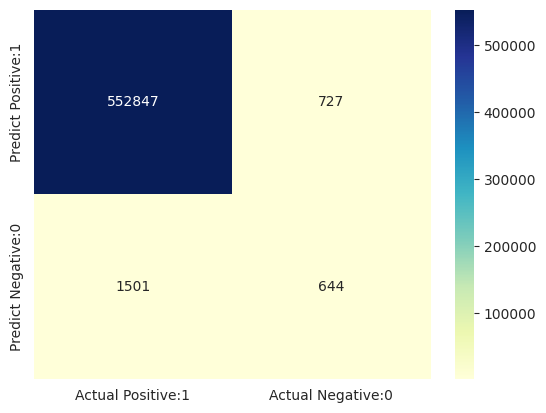

In [91]:
cm = confusion_matrix(y_test, y_pred_adaboost)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [92]:
report = classification_report(y_test, y_pred_adaboost)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.47      0.30      0.37      2145

    accuracy                           1.00    555719
   macro avg       0.73      0.65      0.68    555719
weighted avg       1.00      1.00      1.00    555719



In [93]:
# calculate the FPR and TPR for all thresholds of the classification
probs = adaboost_classifier.predict_proba(X_test)
probs = probs[:, 1]
ab_fpr, ab_tpr, thresholds = metrics.roc_curve(y_test, probs)
ab_auc = metrics.roc_auc_score(y_test, probs)

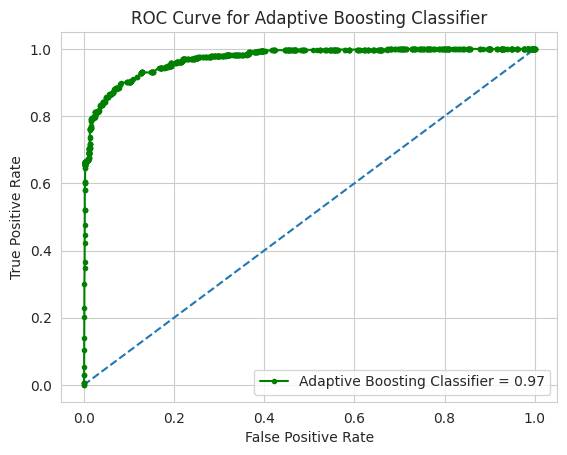

In [94]:
plt.title('ROC Curve for Adaptive Boosting Classifier')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(ab_fpr, ab_tpr, 'g', marker='.', label = 'Adaptive Boosting Classifier = %0.2f' % ab_auc )
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 8.) XGBOOST CLASSIFIER

In [95]:
import xgboost as xgb

In [96]:
XGB_clf = xgb.XGBClassifier(colsample_bytree= 0.94, eta= 0.25000000000000006, gamma= 5, min_child_weight= 1.5, subsample= 0.94,objective = "binary:logistic")
XGB_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.94, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.25000000000000006,
              eval_metric=None, feature_types=None, gamma=5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=1.5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [97]:
y_pred_XGB = XGB_clf.predict(X_test)

In [98]:
print('The accuracy of XGBoost Classifier is: ' + str(accuracy_score(y_test, y_pred_XGB)))

The accuracy of XGBoost Classifier is: 0.9977164718139924


<Axes: >

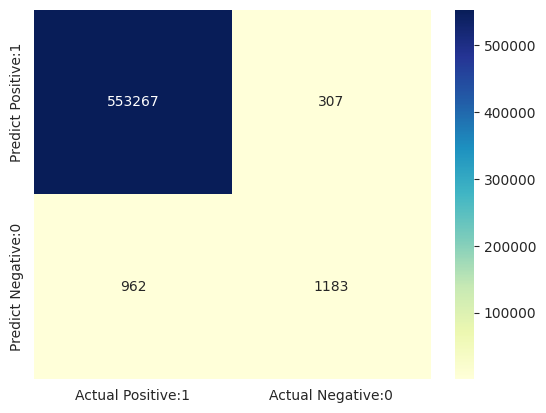

In [99]:
cm = confusion_matrix(y_test, y_pred_XGB)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [100]:
report = classification_report(y_test, y_pred_XGB)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.79      0.55      0.65      2145

    accuracy                           1.00    555719
   macro avg       0.90      0.78      0.82    555719
weighted avg       1.00      1.00      1.00    555719



In [101]:
# calculate the FPR and TPR for all thresholds of the classification
probs = XGB_clf.predict_proba(X_test)
probs = probs[:, 1]
xgb_fpr, xgb_tpr, thresholds = metrics.roc_curve(y_test, probs)
xgb_auc = metrics.roc_auc_score(y_test, probs)

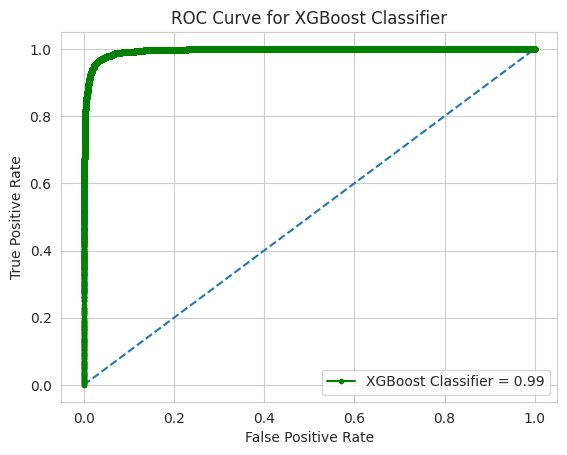

In [102]:
plt.title('ROC Curve for XGBoost Classifier')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(xgb_fpr, xgb_tpr, 'g', marker='.', label = 'XGBoost Classifier = %0.2f' % xgb_auc )
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()